In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
uk_results = pd.read_csv('Data/HoC-GE2019-results-by-constituency.csv')
uk_boundaries = gpd.read_file('Data/GB/GB_Constituencies_2023.shp')

In [3]:
uk_results.rename(columns={'ONS ID':'CODE'},inplace=True)

In [4]:
resutls = uk_boundaries.merge(uk_results, on='CODE')

In [5]:
resutls['Turnout'] =  (resutls['Valid votes'] + resutls['Invalid votes']) / resutls['Electorate']

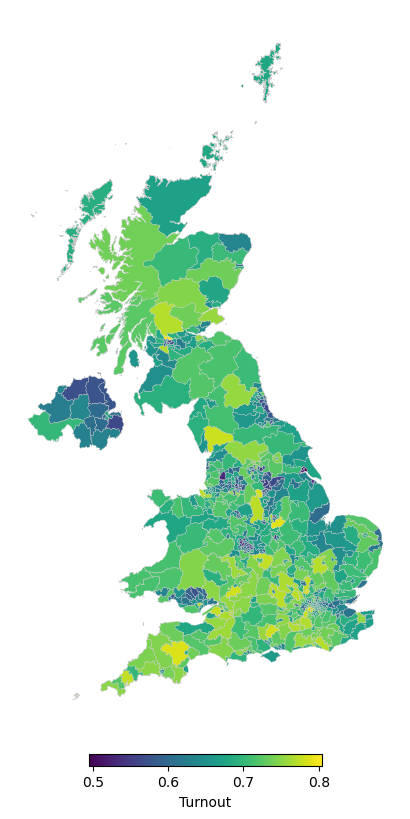

In [6]:
resutls.plot(column='Turnout', cmap='viridis', linewidth=0.2, edgecolor='0.8', legend=True, legend_kwds={'label': "Turnout", 'orientation': "horizontal", 'pad': 0.01, 'shrink': 0.2, 'aspect': 20, 'fraction': 0.05, 'anchor': (0.5, 0.5)}, figsize=(15, 10))
plt.axis('off')
plt.savefig('UK_Election_2019_Turnout.pdf', format='pdf', bbox_inches='tight')

In [7]:
resutls['First party'].unique()

array(['Lab', 'Con', 'SNP', 'PC', 'LD', 'Spk', 'Green', 'DUP', 'SF',
       'SDLP', 'Alliance'], dtype=object)

In [8]:
party_colors = {
   "Con":"#0087dc", 
   "LD":"#FDBB30", 
   "Lab":"#d50000", 
   "SNP":"#FFF95D", 
   "PC":"#3F8428",
   "Green": "#6AB023",
   "DUP":"#D46A4C",
   "SF":"#326760",
   "SDLP":"#99FF66",  
}

In [9]:
resutls['winner_fill'] = resutls['First party'].apply(lambda s: party_colors.get(s, '#aaaaaa'))

/home/zak/miniconda3/envs/Elections/lib/python3.9/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


(-32874.78264000016, 688795.96584, -55414.993539999996, 1281058.68434)

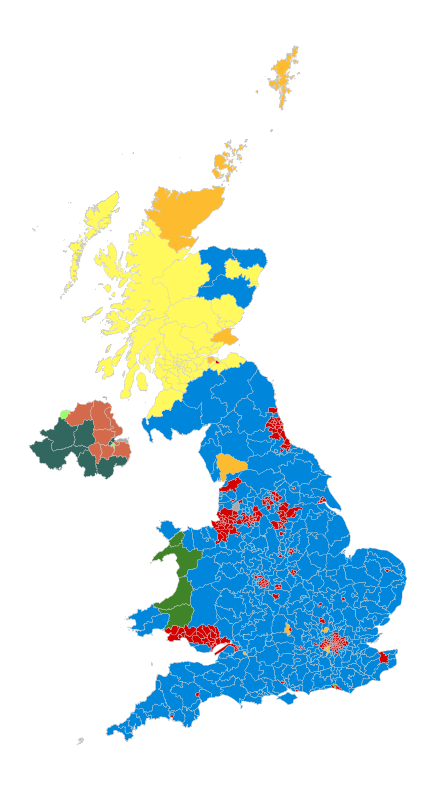

In [10]:
resutls.plot(column='First party', color=resutls['winner_fill'], linewidth=0.2, edgecolor='0.8', legend=True, legend_kwds={'label': "Party", 'orientation': "horizontal", 'pad': 0.01, 'shrink': 0.2, 'aspect': 20, 'fraction': 0.05, 'anchor': (0.5, 0.5)}, figsize=(15, 10))
plt.axis('off')

In [11]:
print('Election Results')
print(resutls['First party'].value_counts())

Election Results
First party
Con         365
Lab         202
SNP          48
LD           11
DUP           8
SF            7
PC            4
SDLP          2
Spk           1
Green         1
Alliance      1
Name: count, dtype: int64


In [19]:
resutls[(resutls['Constituency name'] == 'Hartlepool')]

,NAME,CODE,geometry,ONS region ID,Constituency name,County name,Region name,Country name,Constituency type,Declaration time,...,PC,DUP,SF,SDLP,UUP,Alliance,All other candidates,Of which other winner,Turnout,winner_fill
196,Hartlepool,E14000733,"POLYGON ((440056.120 527806.952, 440053.047 52...",E12000001,Hartlepool,Cleveland,North East,England,Borough,43812.09722,...,0,0,0,0,0,0,1405,0,0.580848,#d50000
